In [ ]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define the directory path
#directory_path = r"C:\Users\Edward Kim\Documents\UT Austin 2020-2021\fifth year first semester\Machine learning\train-commerce-forecasting-main\scratchpad\Data"
directory_path = "../data"

# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

In [11]:
train=files[0:8]
test=files[8:9]
#validation=files[8:9]

In [12]:
train

['All_Traffic 2011.csv',
 'All_Traffic 2012.csv',
 'All_Traffic 2013.csv',
 'All_Traffic 2014.csv',
 'All_Traffic 2015.csv',
 'All_Traffic 2016.csv',
 'All_Traffic 2017.csv',
 'All_Traffic 2018.csv']

In [13]:
test

['All_Traffic 2019.csv']

In [14]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []
#x_validation_All_Traffic = []
#y_validation_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    x_All_Traffic['year'] = int(file[12:16])
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    x_test_All_Traffic1['year'] = int(file[12:16])
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

# Process the validation file
#for file in validation:
#    # Read the CSV file
#    one_year_data_validation_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
#    
#    # Drop rows with missing values
#    one_year_data_validation_All_Traffic.dropna(inplace=True)
#    
#    # Split into features and target
#    x_validation_All_Traffic1 = one_year_data_validation_All_Traffic.drop(columns=['log_carloads','BEA_origin','BEA_dest'], inplace=False)
#    y_validation_All_Traffic1 = one_year_data_validation_All_Traffic['log_carloads']
#    
#    # Append data to validation lists
#    x_validation_All_Traffic.append(x_validation_All_Traffic1)
#    y_validation_All_Traffic.append(y_validation_All_Traffic1)

# Concatenate all the data into DataFrames
x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)
#x_validation_All_Traffic = pd.concat(x_validation_All_Traffic)
#y_validation_All_Traffic = pd.concat(y_validation_All_Traffic)

#print(x_train_All_Traffic[0:9])

# save column names of x_train_All_Traffic
column_names = x_train_All_Traffic.columns
column_names_begin = column_names[0:1]
column_names_end = column_names[3:]
column_names_orig = list(column_names_begin.append(column_names_end))

# One-hot encode the categorical features
# encoder = OneHotEncoder(sparse=False, drop=None)
encoder = OneHotEncoder(drop=None)
x_train_All_Traffic_encoded = encoder.fit_transform(x_train_All_Traffic.iloc[:,1:3])
x_test_All_Traffic_encoded = encoder.transform(x_test_All_Traffic.iloc[:,1:3])
# extra_columns=len(x_train_All_Traffic_encoded[0])
extra_columns = x_train_All_Traffic_encoded[0].shape[0]
column_names = column_names_orig + ['encoded' + str(i) for i in range(extra_columns)]

# get rid of columns that were encoded
x_train_All_Traffic = x_train_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)
x_test_All_Traffic = x_test_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)

# Scaling the data
scaler = StandardScaler()
x_train_All_Traffic_scaled = scaler.fit_transform(x_train_All_Traffic)
x_test_All_Traffic_scaled = scaler.transform(x_test_All_Traffic)
#x_validation_All_Traffic_scaled = scaler.transform(x_validation_All_Traffic)

# now add encoded data to the scaled data
x_train_All_Traffic = pd.concat([pd.DataFrame(x_train_All_Traffic_scaled), pd.DataFrame(x_train_All_Traffic_encoded)], axis=1)
x_test_All_Traffic = pd.concat([pd.DataFrame(x_test_All_Traffic_scaled), pd.DataFrame(x_test_All_Traffic_encoded)], axis=1)

# add column names to first 21 columns of x_train_All_Traffic and x_test_All_Traffic
x_train_All_Traffic.columns = column_names
x_test_All_Traffic.columns = column_names

KeyboardInterrupt: 

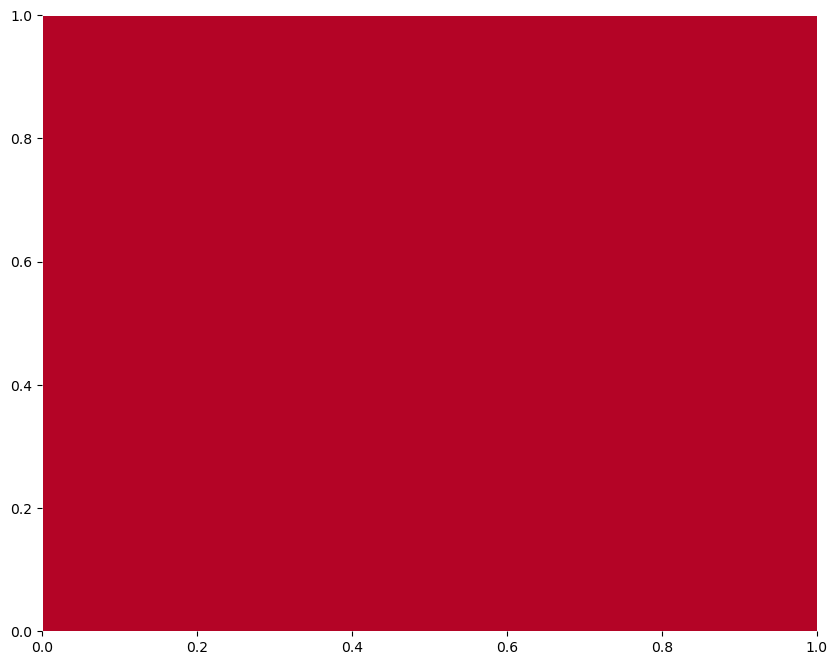

In [15]:
import seaborn as sns
#get correlations of each non-encoded features in dataset
#correlation_matrix = x_train_All_Traffic_scaled.corr()
x_train_All_Traffic_scaled_pd=pd.DataFrame(x_train_All_Traffic_scaled)
x_train_All_Traffic_scaled_pd.columns = column_names_orig
correlation_matrix = x_train_All_Traffic_scaled_pd.corr()
#correlation_matrix = x_train_All_Traffic.corr()

# Generate the heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the heatmap
plt.title("Feature Correlation Heatmap for Training Data")
plt.show()

In [ ]:
#rf for others
from sklearn.ensemble import RandomForestRegressor
rf_model_All_Traffic = RandomForestRegressor( random_state=100,max_depth=20)
rf_model_All_Traffic.fit(x_train_All_Traffic_scaled, y_train_All_Traffic)
y_pred_All_Traffic=rf_model_All_Traffic.predict(x_test_All_Traffic_scaled)
#y_validation_pred_All_Traffic=rf_model_All_Traffic.predict(x_validation_All_Traffic_scaled)

KeyboardInterrupt: 

In [ ]:
y_test_All_Traffic = y_test_All_Traffic.reset_index(drop=True)
#y_validation_All_Traffic = y_validation_All_Traffic.reset_index(drop=True)

In [ ]:
mse_All_Traffic = mean_squared_error(y_test_All_Traffic, y_pred_All_Traffic)
print("All_Traffic Mean squared error:")
print(mse_All_Traffic)
R_All_Traffic=r2_score(y_test_All_Traffic,y_pred_All_Traffic)
adjusted_R_All_Traffic=1-(1-R_All_Traffic)*(len(y_test_All_Traffic)-1)/(len(y_test_All_Traffic)-x_test_All_Traffic_scaled.shape[1]-1)
print("All traffic adjusted R square is")
print(adjusted_R_All_Traffic)
print("----------------------------")
#mse_validation_All_Traffic = mean_squared_error(y_validation_All_Traffic, y_validation_pred_All_Traffic)
#print("All_Traffic Mean squared error for validation:")
#print(mse_validation_All_Traffic)
#R_validation_All_Traffic=r2_score(y_validation_All_Traffic,y_validation_pred_All_Traffic)
#adjusted_R_validation_All_Traffic=1-(1-R_validation_All_Traffic)*(len(y_validation_All_Traffic)-1)/(len(y_validation_All_Traffic)-x_validation_All_Traffic_scaled.shape[1]-1)
#print("All traffic adjusted R square for validation is")
#print(adjusted_R_validation_All_Traffic)
#print("----------------------------")

All_Traffic Mean squared error:
4.04558166677032
All traffic adjusted R square is
0.7230329074458994
----------------------------


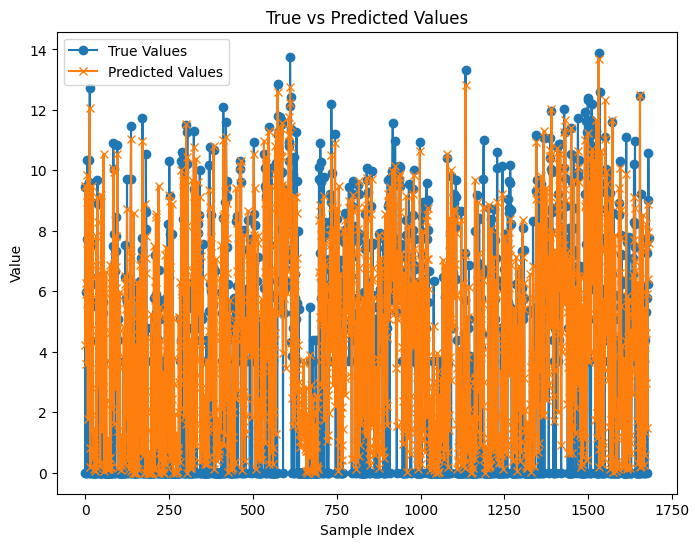

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(y_test_All_Traffic, label='True Values', marker='o')
plt.plot(y_pred_All_Traffic, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

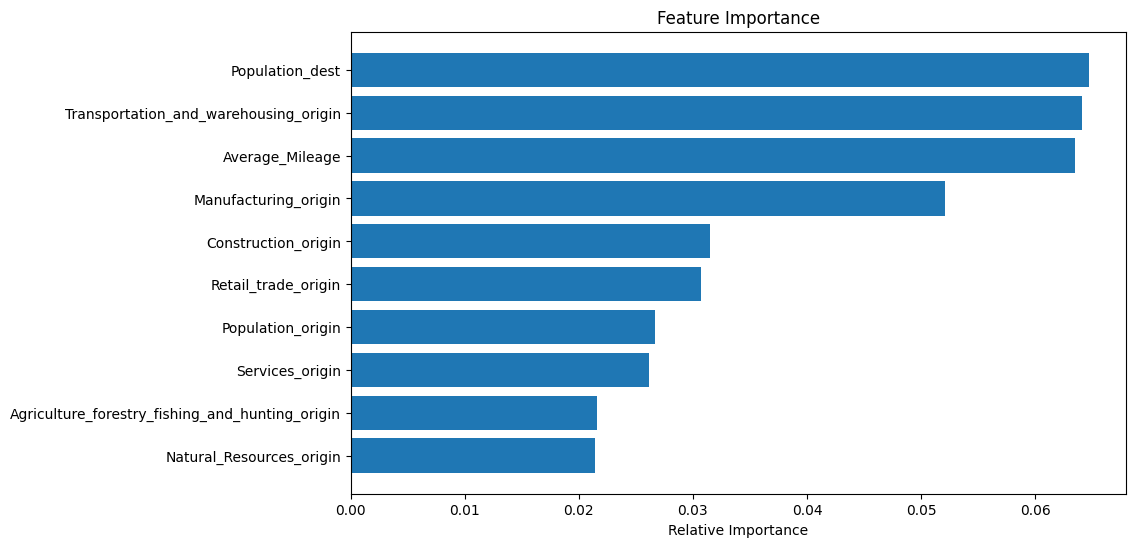

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Example: Train a RandomForest model on your training data
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(x_train_All_Traffic, y_train_All_Traffic)

# Get feature importances and plot
importances = rf_model_All_Traffic.feature_importances_[-10:]
indices = np.argsort(importances)[-10:]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [x_train_All_Traffic.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


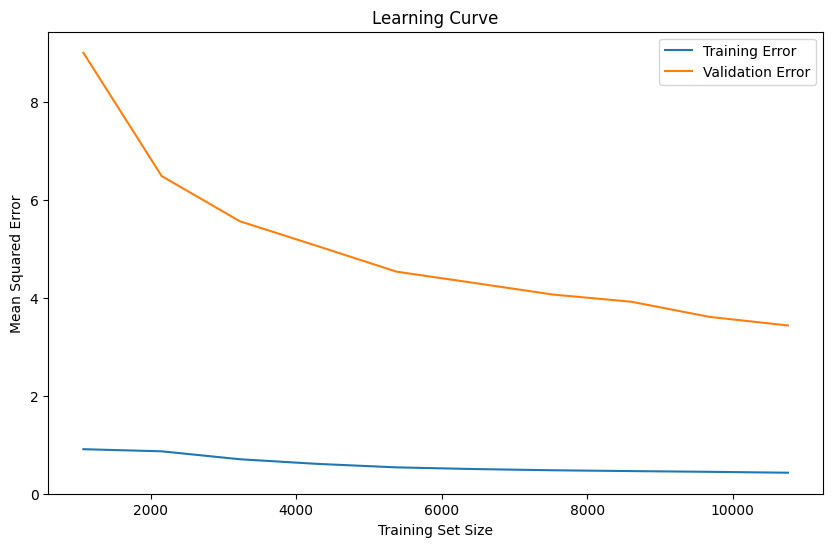

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Example: Using a Random Forest for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100, random_state=42), 
    x_train_All_Traffic_scaled, y_train_All_Traffic, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()